In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException

from common.setups import get_safe_setup, get_local_safe_setup
from common.helpers import get_element_by_selector

driver = get_local_safe_setup()

driver.get("https://quotes.toscrape.com/")

## Getting text from element

In [2]:
first_quote = driver.find_element(By.CLASS_NAME, 'quote')

get_element_by_selector(first_quote, 'span')

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [3]:
first_quote = driver.find_element(By.CSS_SELECTOR, '.quote')

get_element_by_selector(first_quote, 'span')

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

In [4]:
first_quote = driver.find_element(By.XPATH, '/html/body/div/div[2]/div[1]/div[1]')

get_element_by_selector(first_quote, 'span')

'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

## DOM life-cycle

In [5]:
driver.refresh()

try:
    get_element_by_selector(first_quote, 'span')
except Exception as e:
    print(e)

# Query it once again to get the text
first_quote = driver.find_element(By.CLASS_NAME, 'quote')

get_element_by_selector(first_quote, 'span')

Message: stale element reference: element is not attached to the page document
  (Session info: chrome=100.0.4896.60)



'“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”'

## Getting Text From Elements

In [6]:
elements = driver.find_elements(By.CLASS_NAME, 'quote')

for e in elements:
    print(get_element_by_selector(e, 'span'))

“The world as we have created it is a process of our thinking. It cannot be changed without changing our thinking.”
“It is our choices, Harry, that show what we truly are, far more than our abilities.”
“There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”
“The person, be it gentleman or lady, who has not pleasure in a good novel, must be intolerably stupid.”
“Imperfection is beauty, madness is genius and it's better to be absolutely ridiculous than absolutely boring.”
“Try not to become a man of success. Rather become a man of value.”
“It is better to be hated for what you are than to be loved for what you are not.”
“I have not failed. I've just found 10,000 ways that won't work.”
“A woman is like a tea bag; you never know how strong it is until it's in hot water.”
“A day without sunshine is like, you know, night.”


## List All Tags for First Quote

In [7]:
type(first_quote)

selenium.webdriver.remote.webelement.WebElement

In [8]:
first_quote = driver.find_element(By.CLASS_NAME, 'quote')
tags = first_quote.find_elements(By.CLASS_NAME, 'tag')

for t in tags:
    print(t.text)

change
deep-thoughts
thinking
world


## Driver Run Script

In [9]:
driver.execute_script('alert(1)')

## Navigate to Next Page and Then Get Back

In [10]:
driver.execute_script("window.scrollBy(0,500)")

next_page = driver.find_element(By.CSS_SELECTOR, '.next a')
next_page.click()

In [11]:
prev_page = driver.find_element(By.CSS_SELECTOR, '.previous a')
prev_page.click()

## Make a screenshot

In [12]:
from PIL import Image
from io import BytesIO

first_quote = driver.find_element(By.CSS_SELECTOR, '.quote')

location = first_quote.location
size = first_quote.size

png = driver.get_screenshot_as_png() 

im = Image.open(BytesIO(png)) 

left = location['x']
top = location['y']
right = location['x'] + size['width']
bottom = location['y'] + size['height']


im = im.crop((left, top, right, bottom)) # defines crop points
im.save('./screenshot.png') # saves new cropped image

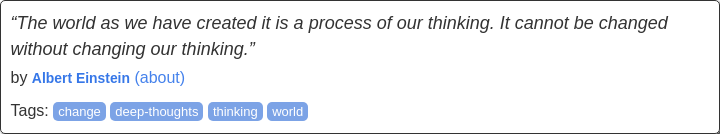

In [13]:
from IPython.display import Image
Image(filename='./screenshot.png') 